In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
column_names = []
with open("./clean2.names") as f:
    for line in f:
        line = line.strip("\n")
        col_name = line.split(":")[0]
        if len(col_name) == 0:
            continue
        else:
            column_names.append(line.split(":")[0])
column_names.append("class")

In [27]:
dat = pd.read_csv("./clean2.data", names=column_names)

In [28]:
dat

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


Text(0.5, 1.0, 'Number of unique conformations per molecule')

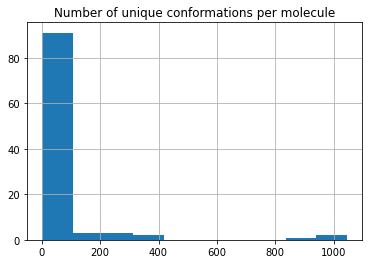

In [51]:
dat.groupby("molecule_name").nunique()["conformation_name"].hist()
plt.title('Number of unique conformations per molecule')

Text(0.5, 1.0, 'Number of unique classes per molecule')

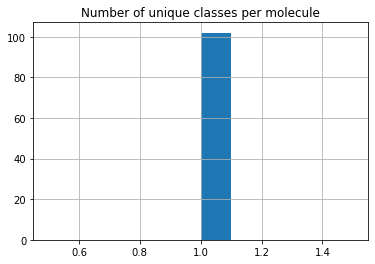

In [53]:
dat.groupby("molecule_name").nunique()["class"].hist()
plt.title('Number of unique classes per molecule')

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/home/christopherhendra/.conda/envs/musk/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


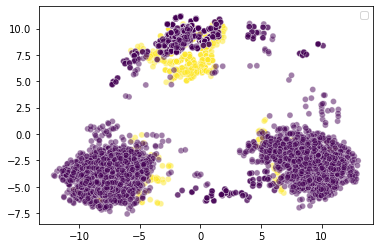

In [60]:
dat["class"] = dat["class"].astype('category')
pca_features = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(dat[dat.columns[2:]]))
sns.scatterplot(pca_features[:, 0], pca_features[:, 1], c=dat["class"], alpha=0.5)
plt.legend()

In [72]:
dat.groupby("molecule_name").nunique()["conformation_name"].sort_values(ascending=False).head(n=10)

molecule_name
NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
NON-MUSK-192      286
NON-MUSK-197      277
MUSK-217          215
NON-MUSK-326      141
NON-MUSK-251      140
Name: conformation_name, dtype: int64

Text(0.5, 1.0, 'PCA Plot of MUSK-217 and NON_MUSK-f146')

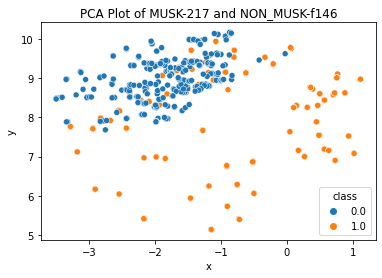

In [80]:
pca_features = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(dat[dat.columns[2:]]))
dat["x"] = pca_features[:, 0]
dat["y"] = pca_features[:, 1]
mask = dat["molecule_name"].isin(['MUSK-217', 'NON-MUSK-f146'])
sns.color_palette("Set2")
sns.scatterplot(x="x", y="y", data=dat[mask], hue=dat["class"][mask])
plt.title('PCA Plot of MUSK-217 and NON_MUSK-f146')

In [74]:
dat[dat["molecule_name"] == 'MUSK-217']

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
228,MUSK-217,217_1+1,46,-192,-143,31,-117,49,49,-170,...,-87,-15,45,148,141,165,-67,-147,34,1.0
229,MUSK-217,217_1+10,46,-199,-105,31,-117,50,24,-101,...,-86,-16,43,149,141,165,-67,-147,33,1.0
230,MUSK-217,217_1+100,44,-157,-61,-75,-116,16,44,-113,...,-63,-114,-13,152,133,155,-65,-140,9,1.0
231,MUSK-217,217_1+101,44,-158,-61,-75,-116,15,44,-113,...,-64,-115,-13,152,133,155,-65,-140,10,1.0
232,MUSK-217,217_1+102,52,-163,-54,-64,-116,56,52,-143,...,-301,61,-39,-28,111,167,-44,-114,114,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,MUSK-217,217_2+95,52,-169,-54,-72,-117,9,7,-115,...,-73,-122,-38,-19,114,166,-45,-114,113,1.0
439,MUSK-217,217_2+96,45,-80,-63,-44,-117,-44,29,-153,...,-47,26,-20,151,134,155,-65,-141,-2,1.0
440,MUSK-217,217_2+97,47,-100,-61,-64,-116,55,36,-171,...,-306,57,-15,-1,114,164,-49,-118,103,1.0
441,MUSK-217,217_2+98,47,-100,-61,-64,-116,54,36,-171,...,-306,57,-15,0,114,164,-49,-118,103,1.0
